In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import os

In [39]:
import urllib
import zipfile

data_dir = os.path.join('data', 'rps')
data_val_dir = os.path.join('data', 'rps-validation')
data_test_dir = os.path.join('data', 'rps-test')

if (not os.path.isdir(data_dir)) or (not os.path.isdir(data_val_dir)):
    train_zip = os.path.join('data', 'rps.zip')
    val_zip = os.path.join('data', 'rps-validation.zip')
    test_zip = os.path.join('data', 'rps-test.zip')
    
    if (not os.path.exists(train_zip)) or (not os.path.exists(val_zip)):
        train_url = 'https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip'
        # validation and test sets are flipped in the data source
        val_url = 'https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip'
        test_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip'
        
        urllib.request.urlretrieve(train_url, train_zip)
        urllib.request.urlretrieve(val_url, val_zip)
        urllib.request.urlretrieve(test_url, test_zip)
    
    with zipfile.ZipFile(train_zip) as file:
        file.extractall('data')
        
    with zipfile.ZipFile(val_zip) as file:
        file.extractall('data')
        os.rename(os.path.join('data', 'rps-test-set'), data_val_dir)
        
    with zipfile.ZipFile(test_zip) as file:
        file.extractall(data_test_dir)

In [9]:
def check_img_dir(directory):
    for d in os.listdir(directory):
        files = os.listdir(os.path.join(directory, d))
        print(f'\nThere are {len(files)} {d} images:')
        print(files[:10])

In [42]:
print('Training set:')
check_img_dir(data_dir)

print('\nValidation set:')
check_img_dir(data_val_dir)

Training set:

There are 840 paper images:
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']

There are 840 rock images:
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']

There are 840 scissors images:
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']

Validation set:

There are 124 paper images:
['testpaper01-00.png', 'testpaper01-01.png', 'testpaper01-02.png', 'testpaper01-03.png', 'testpaper01-04.png', 'testpaper01-05.png', 'testpaper01-06.png', 'testpaper01-07.png', 'testpaper01-08.png', 'testpaper01-09.png']

There are 124 rock images:
['testroc

In [21]:
def view_img_sample(directory, i0=0, nimg=4):
    nclass = len(os.listdir(directory))
    
    fig, axs = plt.subplots(nclass, nimg, figsize=(4*nclass, 4*nimg))
    for ci, ctg in enumerate(os.listdir(directory)):
        for j, img_name in enumerate(os.listdir(os.path.join(directory, ctg))[i0:i0+nimg]):
            img = plt.imread(os.path.join(directory, ctg, img_name))
            axs[ci, j].imshow(img)
            axs[ci, j].axis('off')

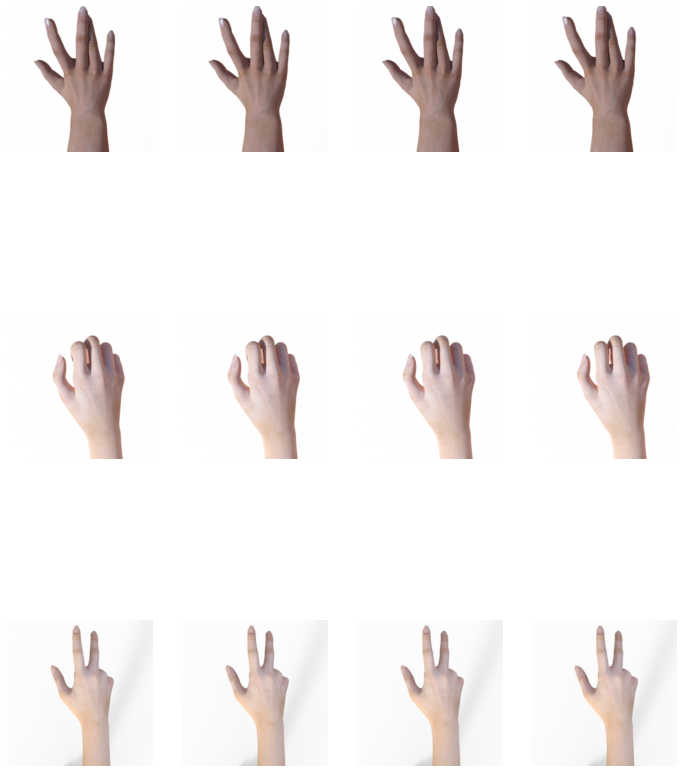

In [43]:
view_img_sample(data_dir)

In [44]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data = train_gen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=126
)

val_gen = ImageDataGenerator(rescale=1/255)
val_data = val_gen.flow_from_directory(
    data_val_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [45]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [31]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [46]:
%%time

history = model.fit(
    train_data,
    epochs=25,
    validation_data=val_data
)

Epoch 1/25
20/20 [==============================] - 16s 749ms/step - loss: 1.2906 - accuracy: 0.3687 - val_loss: 1.0464 - val_accuracy: 0.5081
Epoch 2/25
20/20 [==============================] - 9s 454ms/step - loss: 1.0821 - accuracy: 0.4484 - val_loss: 0.9311 - val_accuracy: 0.7285
Epoch 3/25
20/20 [==============================] - 9s 454ms/step - loss: 0.8978 - accuracy: 0.5956 - val_loss: 0.6051 - val_accuracy: 0.6317
Epoch 4/25
20/20 [==============================] - 9s 460ms/step - loss: 0.8605 - accuracy: 0.6159 - val_loss: 0.4046 - val_accuracy: 0.9812
Epoch 5/25
20/20 [==============================] - 9s 452ms/step - loss: 0.6864 - accuracy: 0.7000 - val_loss: 0.9867 - val_accuracy: 0.5376
Epoch 6/25
20/20 [==============================] - 9s 461ms/step - loss: 0.6242 - accuracy: 0.7397 - val_loss: 0.5346 - val_accuracy: 0.8414
Epoch 7/25
20/20 [==============================] - 9s 452ms/step - loss: 0.4595 - accuracy: 0.8155 - val_loss: 0.3796 - val_accuracy: 1.0000
Epoch

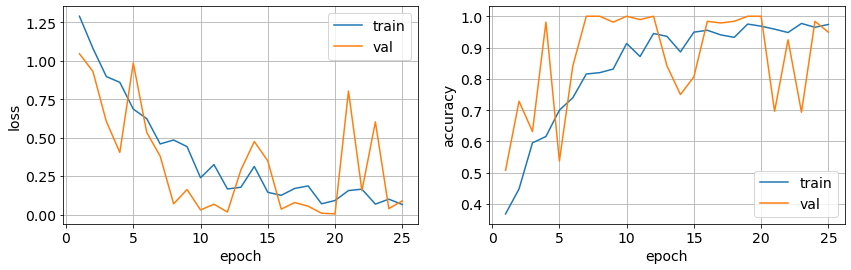

In [47]:
import utilities

utilities.plot_train_val_metrics(history, ['loss', 'accuracy'])

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model2.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
%%time

history2 = model2.fit(
    train_data,
    epochs=25,
    validation_data=val_data
)
utilities.plot_train_val_metrics(history2, ['loss', 'accuracy'])